# **MILESTONE 1 - PHASE 2**

Nama : Krisbiantoro Prabowo

Batch : 008
<hr>

## **1. Description**
### 1.1 Objective
Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

- Mampu memahami konsep Artificial Neural Network.
- Mampu mempersiapkan data untuk digunakan dalam model Artificial Neural Network.
- Mampu mengimplementasikan Artificial Neural Network dengan data yang diberikan.
- Mampu menganalisis dan menjelaskan layer yang dibuat.

### 1.2 Problem Statements

Diberikan sebuah dataset yang berisi informasi mengenai data pelanggan layanan internet dan telepon rumah di California pada Kuartal ke 3. Prediksilah "behavior" atau kecenderungan karakteristik yang dimiliki oleh pelanggan yang telah berhenti menggunakan layanan ataupun mereka yang tetap masih menggunakan penyedia layanan perusahaan telekomunikasi ini menggunakan model Artifical Neural Network(ANN). Diharapkan nantinya model prediksi yang dibangun dapat mengetahui perilaku dan karakteristik pelanggan sehingga perusahaan dapat melakukan tindakan untuk mempertahankan tingkat pelanggan yang berhenti untuk tidak kian meninggi.
<hr>

## **2. Import Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import pickle
import tensorflow as tf

pd.options.mode.chained_assignment = None

In [4]:
tf.config.set_visible_devices([], 'GPU')

In [5]:
colors = sns.color_palette("Set2")
colors2 = sns.color_palette("Paired")
sns.set_style("whitegrid")
plt.style.use('seaborn-pastel')
pd.set_option('display.max_columns', None)

## **3. Data Loading**

### 3.1. Loading Dataset

In [6]:
df = pd.read_csv('telco_customer_churn.csv')

### 3.2. Rename Columns

- Untuk lebih memudahkan dalam pengerjaan, seluruh nama kolom diubah menjadi lowercase

In [7]:
df.columns = [str(x).lower() for x in df.columns]

## **4. Exploratory Data Analysis**

### 4.1. Brief Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


- Jika hanya melihat dari jumlah baris data, tidak ditemukannya missing value dari tiap kolom
- Namun terdapat satu kejanggalan dimana kolom `totalcharges` memiliki tipe data object padahal jika kita liat kolom ini berisi nilai numerik. Kita akan coba telusur lebih dalam apa yang menyebabkan kolom ini bersifat object

In [9]:
df['totalcharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: totalcharges, Length: 6531, dtype: int64

- Ternyata jika dikelompokkan berdasarkan nilainya, teradpat hingga 11 baris yang hanya berisi spasi atau blank (' '). Inilah yang menjadi penyebab mengapa kolom `totalcharges` bertipe object
- Kita akan mengubah nilai yang hanya berisi spasi ini dengan `NaN` terlebih dahulu dan mengubah tipe data menjadi float. Hal ini dikarenakan kita ingin melihat korelasi dan hubungan kolom ini terhadap kolom-kolom lainnya
- Nantinya kita akan mengisinya dengan nilai yang sudah ditentukan berdasarkan hasil eksplorasi data

In [10]:
df['totalcharges'] = df['totalcharges'].replace(' ', np.nan)
df['totalcharges'] = df['totalcharges'].astype('float64')
df['totalcharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [11]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']
Categorical Columns:  ['customerid', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'churn']


- Dataset mayoritas terdiri dari 17 kolom `Kategorik` dan sisanya 4 kolom merupakan `Numerik` yang dimana salah satunya yaitu kolom `seniorcitizen` adalah nilai kategorik yang telah diberi label (0/1).

### 4.2. Statistical Descriptive

In [12]:
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- Tampaknya pada kolom numerik ini, tidak terlihat akan ditemukannya `outlier` dikarenakan pendistribusian nilai yang tidak terlalu jauh selisihnya antara satu quartile dengan quartile lain termasuk pada Q3 - Q4(max). Mungkin saja totalcharges memiliki `outlier` namun tetap harus diperhatikan pendistribusian data pada kolom ini terlebih dahulu
- Kita mengabaikan nilai central tendency pada seniorcitizen dikarenakan kolom ini pada dasarnya bersifat kategorik

In [13]:
skewness = pd.DataFrame({'columns':df.describe().columns, 'skew' : df.skew(axis=0)})
skewness.reset_index(drop=True, inplace=True)

/var/folders/gt/ztn1_6ks3pzcv7b7gq4nrxjr0000gn/T/ipykernel_7854/4209874218.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = pd.DataFrame({'columns':df.describe().columns, 'skew' : df.skew(axis=0)})


In [14]:
skewness['status'] = np.where(skewness['skew'].abs()>0.5, 'Skewed', 'Normal')
skewness

,columns,skew,status
0,seniorcitizen,1.833633,Skewed
1,tenure,0.239540,Normal
2,monthlycharges,-0.220524,Normal
3,totalcharges,0.961642,Skewed


- Kolom Numerik untuk tenure dan monthlycharges bersifat `normal`
- Sedangkan kolom totalcharges bersifat `skewed`
- Kita akan menggunakan teknik `standardscaler` karena distribusi data yang memiliki rentang/gap yang tinggi pada kebanyakan kolom sekalipun pada kolom yang bersifat `skewed`

### 4.3. Columns Analysis

In [15]:
df.corr()

,seniorcitizen,tenure,monthlycharges,totalcharges
seniorcitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
monthlycharges,0.220173,0.247900,1.000000,0.651065
totalcharges,0.102411,0.825880,0.651065,1.000000


In [16]:
df_cor=df.corr()
for i in df_cor:
    j=0
    df_cor[i] = np.where(df_cor[i].abs()>0.1, df_cor[i], 'low')

In [17]:
for i in df_cor:
    print(f'Column: {i}')
    low_corr = df_cor[i][(df_cor[i] == "low")].value_counts().tolist()
    if low_corr:
        print('low:',low_corr)
    else:
        print('low:',0)
    print("="*20)

Column: seniorcitizen
low: [1]
Column: tenure
low: [1]
Column: monthlycharges
low: 0
Column: totalcharges
low: 0


- Pada dasarnya untuk ketiga kolom tenur, monthlycharges, dan totalcharges sama-sama memiliki korelasi yang kuat, kita akan melihat hubungan ketiga kolom ini lebih jauh pada subbab selanjutnya

In [18]:
for i in cat_columns:
    print(f'Cat Columns: {i}')
    print(f'{df[i].nunique()}')
    print('='*20)

Cat Columns: customerid
7043
Cat Columns: gender
2
Cat Columns: partner
2
Cat Columns: dependents
2
Cat Columns: phoneservice
2
Cat Columns: multiplelines
3
Cat Columns: internetservice
3
Cat Columns: onlinesecurity
3
Cat Columns: onlinebackup
3
Cat Columns: deviceprotection
3
Cat Columns: techsupport
3
Cat Columns: streamingtv
3
Cat Columns: streamingmovies
3
Cat Columns: contract
3
Cat Columns: paperlessbilling
2
Cat Columns: paymentmethod
4
Cat Columns: churn
2


- Tidak ada kolom yang memiliki tingkat kardinalitas yang tinggi kecuali pada `customerid`

In [19]:
def print_unique_col_value(data):
    for column in data:
        if data[column].dtypes=='object':
            print(f'{column}:{data[column].unique()}')

In [20]:
print_unique_col_value(df)

customerid:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
partner:['Yes' 'No']
dependents:['No' 'Yes']
phoneservice:['No' 'Yes']
multiplelines:['No phone service' 'No' 'Yes']
internetservice:['DSL' 'Fiber optic' 'No']
onlinesecurity:['No' 'Yes' 'No internet service']
onlinebackup:['Yes' 'No' 'No internet service']
deviceprotection:['No' 'Yes' 'No internet service']
techsupport:['No' 'Yes' 'No internet service']
streamingtv:['No' 'Yes' 'No internet service']
streamingmovies:['No' 'Yes' 'No internet service']
contract:['Month-to-month' 'One year' 'Two year']
paperlessbilling:['Yes' 'No']
paymentmethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn:['No' 'Yes']


- Sangatlah wajar jika kolom kategorik tidak memiliki kardinalitas yang tinggi karena jika dilihat pola pada datanya, kolom kategorikal kebanyakan berisi pernyataan bagaimana status pelanggan dalam keluarganya, apakah pelanggan menggunakan jasa layanan tertentu dan bagaimana cara pembayaran yang digunakan oleh pelanggan
- Terakhir pada kolom churn atau berisi informasi apakah pelanggan telah berhenti menggunakan layanan atau masih bertahan

### 4.4. Gather Some Information

#### 4.4.1. How Many Customer Had Left?

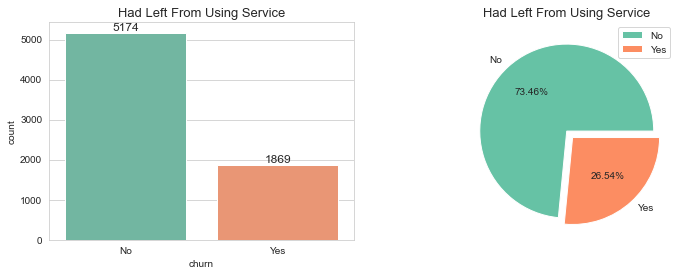

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = sns.countplot(x='churn', data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Had Left From Using Service', fontsize=13)

plt.subplot(1,2,2)
plt.pie(df['churn'].value_counts(), labels=df['churn'].unique() ,colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Had Left From Using Service', fontsize=13)
plt.legend()
plt.show()

- Terdapat hingga 5174(73.46%) pelanggan yang masih bertahan menggunakan jasa penyedia layanan telekomunikasi ini dan sisanya sebanyak 1869 pelanggan atau kurang lebih sebesar 26.54% sudah berhenti menggunakan layanan ini dalam sebulan terakhir
- Dengan hasil ini, dataset bersifat `imbalance` pada kolom target yang akan kita prediksi. Namun selisih yang dihasilkan masih belum terlalu besar hanya kurang lebih 3x-nya saja 

In [22]:
df.query('churn=="Yes" & tenure==1')

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
80,5919-TMRGD,Female,0,No,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.35,79.35,Yes
133,3091-FYHKI,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,35.45,35.45,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6943,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.50,30.50,Yes
6969,4745-LSPLO,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.50,20.50,Yes
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


#### 4.4.2. How Many Freshly Sign Up Customer? And Had Been Loyal For A Year And More?

In [23]:
df.query('tenure==1').head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


In [24]:
print("Jumlah pelanggan yang baru saja mendaftar (~1bulan):", df.query('tenure==1').shape[0])
print("Jumlah pelanggan yang baru saja berhenti (~1bulan):", df.query('churn=="Yes"').shape[0])
print("Rasio Perbandingan", np.round(df.query('tenure==1').shape[0]/df.query('churn=="Yes"').shape[0]*100),": 100")


Jumlah pelanggan yang baru saja mendaftar (~1bulan): 613
Jumlah pelanggan yang baru saja berhenti (~1bulan): 1869
Rasio Perbandingan 33.0 : 100


- Terdapat hingga 613 pelanggan yang baru saja mendaftar pada penyedia layanan telekomunikasi ini
- Dimana jika dibandingkan dengan yang telah berhenti menggunakan layanan, Dari 33 orang yang baru saja mendaftar terdapat hingga 100 orang yang telah berhenti menggunakan layanan
- Karena ini hanya berdasarkan data dalam satu bulan terakhir kita tidak memastikan secara keseluruhan apakah rasio ini masih dianggap wajar oleh perusahaan karena bisa saja pada bulan-bulan sebelumnya jumlah yang mendaftar jauh lebih banyak dibandingkan yang telah berhenti. Namun jika trend rasio ini ternyata masih terus berlanjut, hal ini justru akan membahayakan perusahaan dan perlu tindakan lebih lanjut untuk mempertahankan pelanggan pada rentang angka yang sehat 

/var/folders/gt/ztn1_6ks3pzcv7b7gq4nrxjr0000gn/T/ipykernel_7854/975882842.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_both = campaign_less.append(campaign_more)


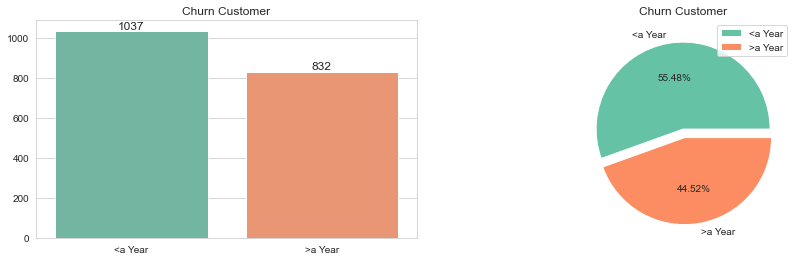

In [25]:
campaign_more = df.query('tenure>12 and churn=="Yes"').value_counts('churn')
campaign_less = df.query('tenure<=12 and churn=="Yes"').value_counts('churn')
count_both = campaign_less.append(campaign_more)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
ax = sns.barplot(y=count_both, x= ['<a Year', '>a Year'], palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Churn Customer')

plt.subplot(1,2,2)
plt.pie(count_both, labels= ['<a Year', '>a Year'], colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Churn Customer')
plt.legend()
plt.show()

- Dari mereka yang telah berhenti menggunakan layanan, 1037 diantaranya telah berlangganan kurang dari satu tahun atau sekitar 56.48%, sedangkan sebanyak 832 atau 44.52% telah berlangganan lebih dari satu tahun
- Meskipun selisih tidak terpaut jauh, namun ternyata banyak pelanggan baru yang justru berhenti menggunakan layanan dibandingkan mereka yang sudah lama berlangganan
- Dengan hal ini perusahaan diharapkan cepat tanggap pada permasalahan atau kendala yang mungkin akan dialami oleh pelanggan, ini dikarenakan psikologis dari pelanggan baru yang sebenarnya tidak bermasalah atau mudah untuk memutuskan berhenti menggunakan layanan dan berpindah ke penyedia layanan lainnya
- Namun tidak lupa juga bahwa harus tetap menjaga kualitas pelayanan kepada pelanggan-pelanggan lama. Karena pada dasarnya pelanggan inilah umumnya tercipta rekomendasi antar mulut ke mulut. Sehingga pelayanan terhadap mereka tidak boleh untuk diremehkan atau dipandang sebelah mata

In [26]:
df.query('tenure>12').value_counts('churn').sum().tolist()

4857

/var/folders/gt/ztn1_6ks3pzcv7b7gq4nrxjr0000gn/T/ipykernel_7854/1766549382.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_both = campaign_less.append(campaign_more)


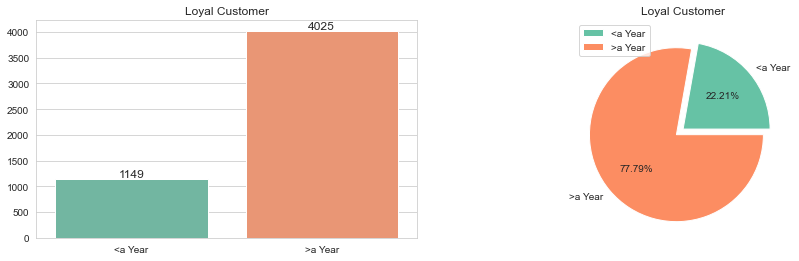

In [27]:
campaign_more = df.query('tenure>12 and churn=="No"').value_counts('churn')
campaign_less = df.query('tenure<=12 and churn=="No"').value_counts('churn')
count_both = campaign_less.append(campaign_more)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
ax = sns.barplot(y=count_both, x= ['<a Year', '>a Year'], palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Loyal Customer')

plt.subplot(1,2,2)
plt.pie(count_both, labels= ['<a Year', '>a Year'], colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Loyal Customer')
plt.legend()
plt.show()

- Dari keseluruhan pelanggan yang masih menggunakan layanan, sebanyak 4025 pelanggan atau 77.70%-nya adalah pelanggan yang loyal, sisanya sebanyak 1149 atau 22.21% yang baru saja berlangganan penyedia layanan telekomunikasi ini
- Terdapat dua kemungkinan, pertama adalah perusahaan berhasil untuk tetap mempertahankan pelanggan lama-nya sehingga masih memiliki jumlah yang tinggi. Kedua, perusahaan bisa saja justru lesu atau lemah untuk efektif dalam pencarian pelanggan baru. Karena kita tidak memiliki data perusahaan saingan, maka kita akan memilih **kemungkinan kedua** dimana hal ini diperkuat pada data yang menunjukkan rasio pelanggan yang masuk dengan yang keluar lebih tinggi mereka yang keluar dalam sebulan terakhir

#### 4.4.4. The More They Paid In A Month, The More Likely They Will Stay To Keep Using The Services?

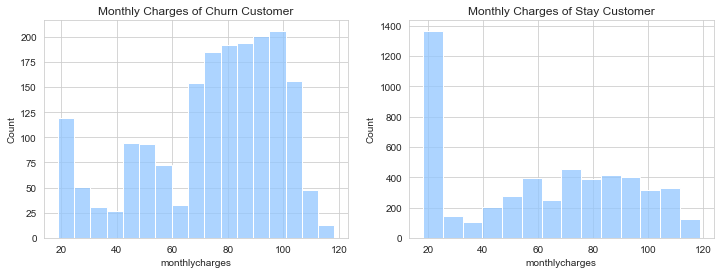

In [28]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(x='monthlycharges', data=df.query('churn=="Yes"'), palette=colors)
plt.title('Monthly Charges of Churn Customer')

plt.subplot(1,2,2)
sns.histplot(x='monthlycharges', data=df.query('churn=="No"'), palette=colors)
plt.title('Monthly Charges of Stay Customer')
plt.show()

- Terlihat jika semakin banyak tagihan yang harus dibayarkan pelanggan, mereka cenderung untuk mudah berhenti menggunakan penyedia layanan internet di perusahaan ini
- Sedangkan mereka yang hanya membayar rendah cenderung tetap bertahan menggunakan penyedia layanan ini apalagi jika dibandingkan dengan jumlah yang telah berhenti
- Oleh karena itu, diharapkan perusahaan dapat lebih meningkatkan kualitas layanannya dan memperhatikan kendala atau permasalahan yang dialami oleh mereka yang telah membayar lebih, mungkin wajar jika mereka banyak mengalami kendala karena semakin banyak jumlah produk layanan yang digunakan seperti telephone, internet, streaming, tech support, online security, dll maka tingkat permasalahan yang akan mereka alami juga semakin tinggi juga

#### 4.4.5. The More They Paid In A Month, The More Likely They Use More Than One Services?

In [29]:
df_demos = df.copy()
df_demos['internetservice'] = np.where(df_demos['internetservice']!='No', 'Yes', 'No')

df_demos['servicecounts']= 0
df_demos['servicecounts'] = np.where(df_demos['phoneservice']=='Yes', df_demos['servicecounts']+1, df_demos['servicecounts'])
df_demos['servicecounts'] = np.where(df_demos['internetservice']=='Yes', df_demos['servicecounts']+1, df_demos['servicecounts'])
df_demos['servicecounts'] = np.where(df_demos['onlinesecurity']=='Yes', df_demos['servicecounts']+1, df_demos['servicecounts'])
df_demos['servicecounts'] = np.where(df_demos['onlinebackup']=='Yes', df_demos['servicecounts']+1, df_demos['servicecounts'])
df_demos['servicecounts'] = np.where(df_demos['deviceprotection']=='Yes', df_demos['servicecounts']+1, df_demos['servicecounts'])
df_demos['servicecounts'] = np.where(df_demos['techsupport']=='Yes', df_demos['servicecounts']+1, df_demos['servicecounts'])
df_demos['servicecounts'] = np.where(df_demos['streamingtv']=='Yes', df_demos['servicecounts']+1, df_demos['servicecounts'])
df_demos['servicecounts'] = np.where(df_demos['streamingmovies']=='Yes', df_demos['servicecounts']+1, df_demos['servicecounts'])

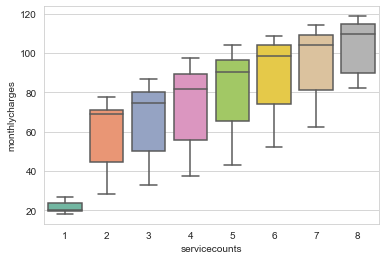

In [30]:
sns.boxplot(data=df_demos, x='servicecounts', y='monthlycharges', palette=colors)
plt.show()

- Semakin banyak layanan yang digunakan oleh pengguna, semakin banyak pula harga yang harus dibayar oleh mereka
- Jumlah kenaikan terlihat normal pada seiring bertambahnya layanan yag digunakan, namun terjadi lonjakan pada jumlah layanan 1 ke 2
- Hal ini dimungkinkan karena biaya layanan internet yang ternyata mahal sehingga lonjakan terjadi pada kasus ini
- Kita bisa memastikan ini adalah biaya layanan internet karena produk layanan lainnya hanya bisa diaktifkan atau digunakan jika telah memiliki layanan internet terlebih dahulu

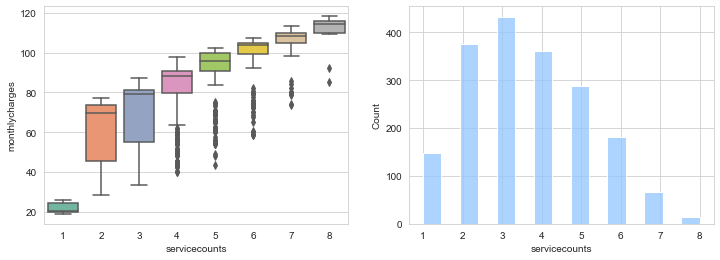

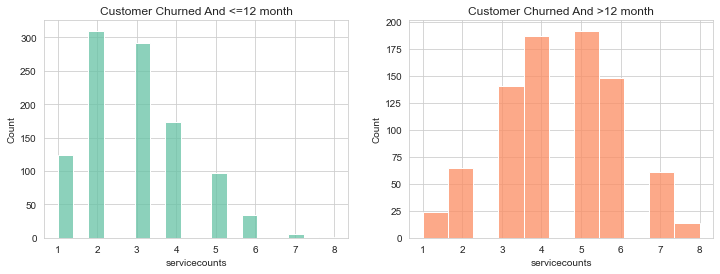

In [31]:
df_demos_yes = df.query('churn=="Yes"').copy()
df_demos_yes['internetservice'] = np.where(df_demos_yes['internetservice']!='No', 'Yes', 'No')

df_demos_yes['servicecounts']= 0
df_demos_yes['servicecounts'] = np.where(df_demos_yes['phoneservice']=='Yes', df_demos_yes['servicecounts']+1, df_demos_yes['servicecounts'])
df_demos_yes['servicecounts'] = np.where(df_demos_yes['internetservice']=='Yes', df_demos_yes['servicecounts']+1, df_demos_yes['servicecounts'])
df_demos_yes['servicecounts'] = np.where(df_demos_yes['onlinesecurity']=='Yes', df_demos_yes['servicecounts']+1, df_demos_yes['servicecounts'])
df_demos_yes['servicecounts'] = np.where(df_demos_yes['onlinebackup']=='Yes', df_demos_yes['servicecounts']+1, df_demos_yes['servicecounts'])
df_demos_yes['servicecounts'] = np.where(df_demos_yes['deviceprotection']=='Yes', df_demos_yes['servicecounts']+1, df_demos_yes['servicecounts'])
df_demos_yes['servicecounts'] = np.where(df_demos_yes['techsupport']=='Yes', df_demos_yes['servicecounts']+1, df_demos_yes['servicecounts'])
df_demos_yes['servicecounts'] = np.where(df_demos_yes['streamingtv']=='Yes', df_demos_yes['servicecounts']+1, df_demos_yes['servicecounts'])
df_demos_yes['servicecounts'] = np.where(df_demos_yes['streamingmovies']=='Yes', df_demos_yes['servicecounts']+1, df_demos_yes['servicecounts'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(data=df_demos_yes, x='servicecounts', y='monthlycharges', palette=colors)

plt.subplot(1,2,2)
sns.histplot(x='servicecounts', data=df_demos_yes.query('churn=="Yes"'), palette=colors)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(x='servicecounts', data=df_demos_yes.query('churn=="Yes" & tenure<=12'), color=colors[0])
plt.title("Customer Churned And <=12 month")

plt.subplot(1,2,2)
sns.histplot(x='servicecounts', data=df_demos_yes.query('churn=="Yes" & tenure>12'), color=colors[1])
plt.title("Customer Churned And >12 month")
plt.show()

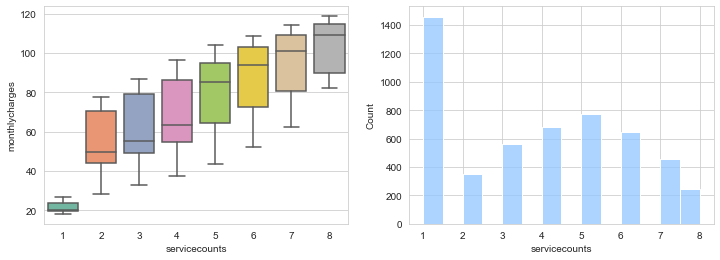

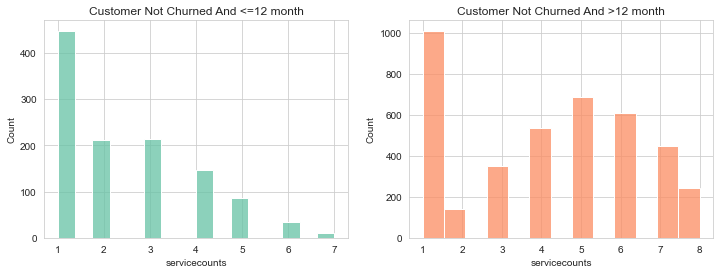

In [32]:
df_demos_no = df.query('churn=="No"').copy()
df_demos_no['internetservice'] = np.where(df_demos_no['internetservice']!='No', 'Yes', 'No')

df_demos_no['servicecounts']= 0
df_demos_no['servicecounts'] = np.where(df_demos_no['phoneservice']=='Yes', df_demos_no['servicecounts']+1, df_demos_no['servicecounts'])
df_demos_no['servicecounts'] = np.where(df_demos_no['internetservice']=='Yes', df_demos_no['servicecounts']+1, df_demos_no['servicecounts'])
df_demos_no['servicecounts'] = np.where(df_demos_no['onlinesecurity']=='Yes', df_demos_no['servicecounts']+1, df_demos_no['servicecounts'])
df_demos_no['servicecounts'] = np.where(df_demos_no['onlinebackup']=='Yes', df_demos_no['servicecounts']+1, df_demos_no['servicecounts'])
df_demos_no['servicecounts'] = np.where(df_demos_no['deviceprotection']=='Yes', df_demos_no['servicecounts']+1, df_demos_no['servicecounts'])
df_demos_no['servicecounts'] = np.where(df_demos_no['techsupport']=='Yes', df_demos_no['servicecounts']+1, df_demos_no['servicecounts'])
df_demos_no['servicecounts'] = np.where(df_demos_no['streamingtv']=='Yes', df_demos_no['servicecounts']+1, df_demos_no['servicecounts'])
df_demos_no['servicecounts'] = np.where(df_demos_no['streamingmovies']=='Yes', df_demos_no['servicecounts']+1, df_demos_no['servicecounts'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(data=df_demos_no, x='servicecounts', y='monthlycharges', palette=colors)

plt.subplot(1,2,2)
sns.histplot(x='servicecounts',data=df_demos_no.query('churn=="No"'))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(x='servicecounts', data=df_demos_no.query('churn=="No" & tenure<=12'), color=colors[0])
plt.title("Customer Not Churned And <=12 month")

plt.subplot(1,2,2)
sns.histplot(x='servicecounts', data=df_demos_no.query('churn=="No" & tenure>12'), color=colors[1])
plt.title("Customer Not Churned And >12 month")

plt.show()

#### 4.4.6. How Many Customers Using Internet Service, Phone Services, Or Even Both?

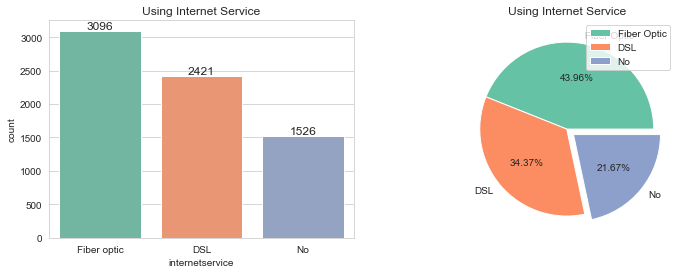

In [33]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = sns.countplot(x='internetservice', order=df['internetservice'].value_counts().index, data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Using Internet Service')

plt.subplot(1,2,2)
plt.pie(df['internetservice'].value_counts(), labels=['Fiber Optic', 'DSL', 'No'] ,colors = colors, explode= (0, 0, 0.1), autopct='%.2f%%')
plt.title('Using Internet Service')
plt.legend()
plt.show()

- Pelanggan yang menggunakan Fiber Optic lebih banyak hingga 43.96% dari total keseluruhan, Selanjutnya diikuti oleh DSL dengan 34.37%
- Pelanggan yang sama sekali tidak berlangganan berjumlah internet sebanyak 1526 atau 21.57%, jumlah ini cukup banyak mengingat jika di era sekarang khususnya area perkotaan mereka yang berlangganan penyedia layanan telekomunikasi umumnya juga mengincar untuk memasang layanan internet di rumah

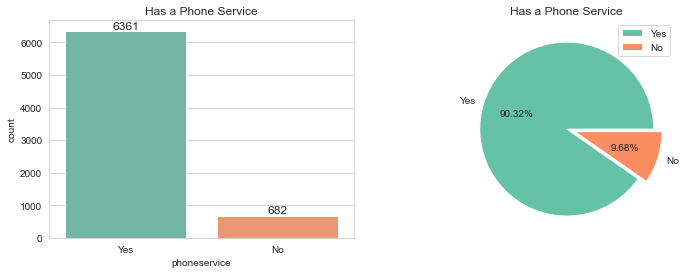

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = sns.countplot(x='phoneservice', order=df['phoneservice'].value_counts().index, data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Has a Phone Service')

plt.subplot(1,2,2)
plt.pie(df['phoneservice'].value_counts(), labels=['Yes', 'No'] ,colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Has a Phone Service')
plt.legend()
plt.show()

- Mayoritas pelanggan ternyata masih banyak yang menggunakan layanan telepon rumah dimana berjumlah hingga 6361 atau sebanyak 90.32%

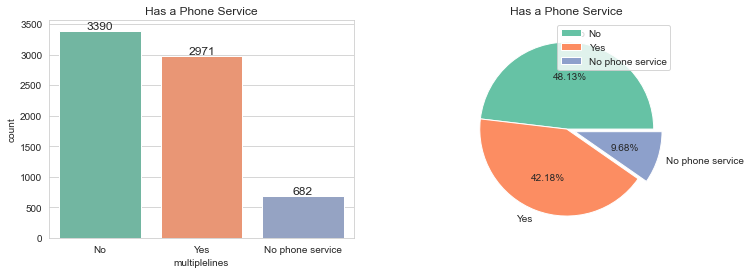

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = sns.countplot(x='multiplelines', order=df['multiplelines'].value_counts().index, data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Has a Phone Service')

plt.subplot(1,2,2)
plt.pie(df['multiplelines'].value_counts(), labels=['No', 'Yes', 'No phone service'] ,colors = colors, explode= (0, 0, 0.1), autopct='%.2f%%')
plt.title('Has a Phone Service')
plt.legend()
plt.show()

- Mereka yang menggunakan layanan telepon rumah, 2971 juga menggunakan layanan internet
- Namun sebanyak 3390 pelanggan atau lebih dari 46.13% masih memilih hanya untuk menggunakan layanan telepon saja tanpa layanan internet

#### 4.4.7. Is Their Demographic Status Affecting Customers To Use Internet Services Products

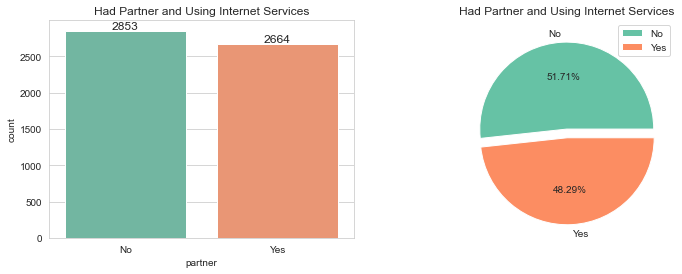

In [36]:
df_demos = df.copy()
df_demos['internetservice'] = np.where(df_demos['internetservice']!='No', 'Yes', 'No')

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = sns.countplot(x='partner', order=df_demos['partner'].value_counts().index, data=df_demos.query('internetservice=="Yes"'), palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Had Partner and Using Internet Services')

plt.subplot(1,2,2)
plt.pie(df_demos.query('internetservice=="Yes"').value_counts('partner'), labels=['No', 'Yes'] ,colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Had Partner and Using Internet Services')
plt.legend()
plt.show()

- Tampaknya terlepas apakah mereka telah memiliki pasangan atau tidak, hal ini tidak mempengaruhi mereka untuk cenderung menggunakan layanan internet
- Dimana sebanyak 51.71% pelanggan yang masih single juga berlangganan layanan internet ini

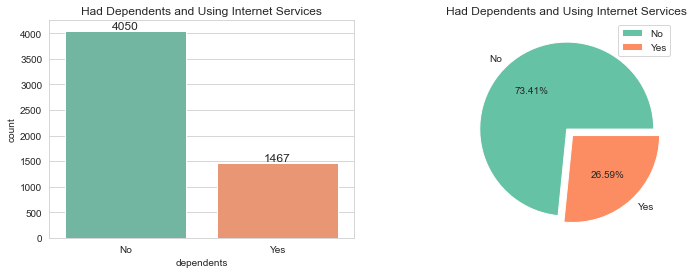

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = sns.countplot(x='dependents', order=df_demos.query('internetservice=="Yes"').value_counts('dependents').index, data=df_demos.query('internetservice=="Yes"'), palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Had Dependents and Using Internet Services')

plt.subplot(1,2,2)
plt.pie(df_demos.query('internetservice=="Yes"').value_counts('dependents'), labels=['No', 'Yes'] ,colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Had Dependents and Using Internet Services')
plt.legend()
plt.show()

- Mereka yang masih belum memiliki tanggung jawab terhadap anggota keluarga lainnya atau yang biasa disebut `Dependent` justru banyak yang berlangganan internet rumah. 
- Dimana dari keseluruhan persentase pelanggan internet, 73.41% dari mereka belum memiliki `dependent`
- Hal ini cukup unik karena biasanya mereka yang memiliki dependent, umumnya tinggal di satu atap/rumah dan untuk memenuhi kebutuhan online mereka, mereka cenderung untuk memasang layanan internet rumahan dibandingkan menggunakan data seluler dari handphone masing-masing karena biaya yang dikeluarkan biasanya jauh lebih murah

#### 4.4.8. Investigate The Missing Value On Final Charges

- Dikarenakan relasi pada kolom `finalcharges` yang terbilang tinggi terhadap kolom `monthlycharges` dan kolom `tenure` kita akan melihat pola datanya terlebih dahulu 
- Pertama kita akan melihat pada mereka yang baru saja berlangganan selama satu bulan

In [38]:
df.query('tenure==1').head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No


- Untuk mereka yang baru saja berlangganan satu bulan, terlihat jik monthlycharges dan tenure dikalikan maka isi dari kolom totalcharges adalah hasil perkalian kedua kolom ini
- Bagaimana dengan mereka yang sudah lebih dari satu bulan, sebelumnya bisa saja dikarenakan tenur masih berjumlah satu jadi tidak terdapat perbedaan/selisih

In [39]:
df.query('tenure>1').head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


- Dari mereka yang telah lebih dari satu bulan, ternyata kebanyakan memiliki selisih meskipun hanya sedikit.
- Contoh pada baris pertama  56.95* 18 = 1936.3, ternyata pada kolom hanya sebesar 1998.5. Begitupun juga dengan kolom dibawahnya
- Namun terdapat satu pola yang didapat, yaitu nilai pada kolom totalcharges tidak akan berselisih signifikan dari hasil perkalian monthlycharges dan tenure
- Bisa saja kemungkinan yang terjadi adalah ada pemotongan biaya ataupun tambahan biaya yang dibebankan kepada pelanggan diluar dari informasi yang terdapat pada tabel ini
- Maka dengan ini kita putuskan bahwa missng value pada kelompok ini bersifat `Missing Not At Random`
- Dan oleh karena itu karena pola sangat jelas, maka kita akan mengisinya dengan perkalian `monthlycharges * tenure` alih-alih menggunakan median/mean imputasi

#### 4.4.9. Which Payment Method Customer Mostly Used? Is it Paperless Too Or Not?

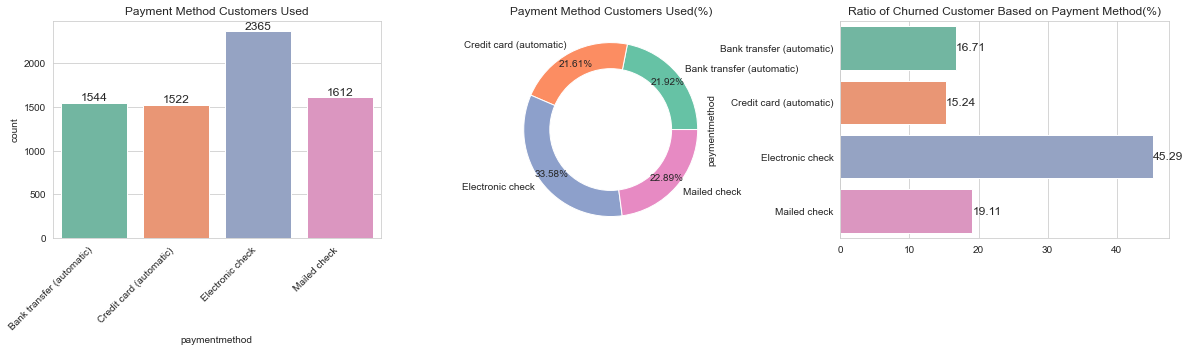

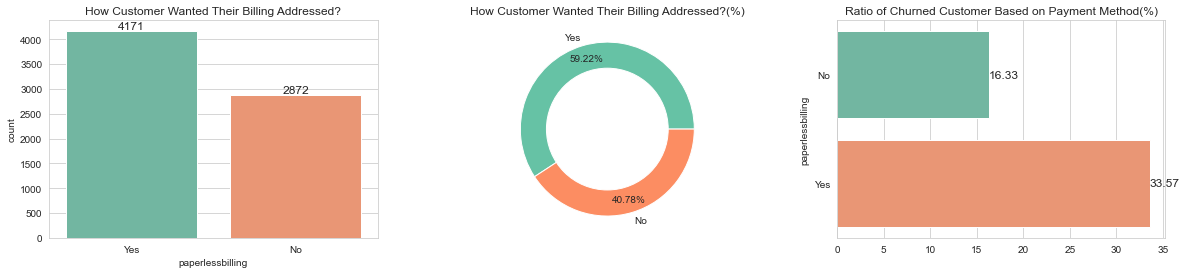

In [40]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
ax = sns.countplot(x='paymentmethod', data=df, palette=colors, order=df['paymentmethod'].value_counts().sort_index().index)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Payment Method Customers Used')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,3,2)
plt.pie(df.value_counts('paymentmethod').sort_index(), labels=df.value_counts('paymentmethod').sort_index().index, autopct="%.2f%%", pctdistance=0.85, colors=colors)
plt.title("Payment Method Customers Used(%)")
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ratio_payment = df.query('churn=="Yes"').value_counts('paymentmethod').sort_index()
ratio_payment = ratio_payment.astype(np.float64)
for i,(k,v) in enumerate(ratio_payment.items()):
    ratio_payment[k] = (ratio_payment[k]/df[(df['paymentmethod']==k)].shape[0]*100).round(2)

plt.subplot(1, 3, 3)
ax = sns.barplot(x=ratio_payment.values, y=ratio_payment.index, order=df['paymentmethod'].value_counts().sort_index().index, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Ratio of Churned Customer Based on Payment Method(%)')

plt.show()
# ================================
# plt.subplot(1,4,1)
# ax = sns.countplot(x='paymentmethod', data=df.query('churn=="Yes"'), order=df['paymentmethod'].value_counts().sort_index().index, palette=colors)
# ax.bar_label(ax.containers[0], fontsize=12)
# plt.title('Payment Method Customers Used')
# plt.xticks(rotation=45, ha='right')

# plt.subplot(1,4,2)
# plt.pie(df.query('churn=="Yes"').value_counts('paymentmethod'), labels=df.value_counts('paymentmethod').sort_index().index, autopct="%.2f%%", pctdistance=0.85, colors=colors)
# plt.title("Payment Method Customers Used(%)")
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)

# plt.subplot(1,4,3)
# ax = sns.countplot(x='paymentmethod', data=df.query('churn=="No"'), order=df['paymentmethod'].value_counts().sort_index().index ,palette=colors)
# ax.bar_label(ax.containers[0], fontsize=12)
# plt.title('Payment Method Customers Used')
# plt.xticks(rotation=45, ha='right')

# plt.subplot(1,4,4)
# plt.pie(df.query('churn=="No"').value_counts('paymentmethod'), labels=df.value_counts('paymentmethod').sort_index().index, autopct="%.2f%%", pctdistance=0.85, colors=colors)
# plt.title("Payment Method Customers Used(%)")
# my_circle=plt.Circle( (0,0), 0.7, color='white')
# p=plt.gcf()
# p.gca().add_artist(my_circle)

# ================================
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
ax = sns.countplot(x='paperlessbilling', data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('How Customer Wanted Their Billing Addressed?')

plt.subplot(1,3,2)
plt.pie(df.value_counts('paperlessbilling'), labels=df.value_counts('paperlessbilling').index, autopct="%.2f%%", pctdistance=0.85, colors=colors)
plt.title("How Customer Wanted Their Billing Addressed?(%)")
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ratio_paperless = df.query('churn=="Yes"').value_counts('paperlessbilling').sort_index()
ratio_paperless = ratio_paperless.astype(np.float64)
for i,(k,v) in enumerate(ratio_paperless.items()):
    ratio_paperless[k] = (ratio_paperless[k]/df[(df['paperlessbilling']==k)].shape[0]*100).round(2)

plt.subplot(1, 3, 3)
ax = sns.barplot(x=ratio_paperless.values, y=ratio_paperless.index, order=df['paperlessbilling'].value_counts().sort_index().index, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Ratio of Churned Customer Based on Payment Method(%)')
plt.show()

#### 4.4.10. Is Senior Citizen Tends To Easily Stop Using Service? How About Gender?

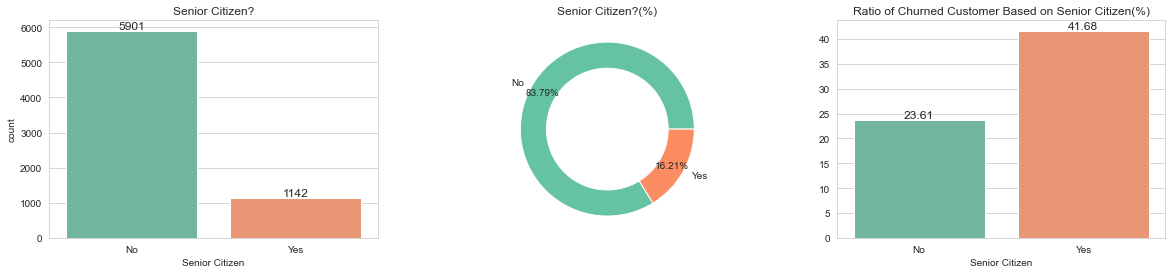

In [41]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
ax = sns.countplot(x='seniorcitizen', data=df, palette=colors)
ax.set_xlabel('Senior Citizen')
ax.set_xticklabels(['No','Yes'])
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Senior Citizen?')

plt.subplot(1,3,2)
plt.pie(df.value_counts('seniorcitizen'), labels=['No', 'Yes'], autopct="%.2f%%", pctdistance=0.85, colors=colors)
plt.title("Senior Citizen?(%)")
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ratio_seniorcitizen = df.query('churn=="Yes"').value_counts('seniorcitizen').sort_index()
ratio_seniorcitizen = ratio_seniorcitizen.astype(np.float64)
for i,(k,v) in enumerate(ratio_seniorcitizen.items()):
    ratio_seniorcitizen[k] = (ratio_seniorcitizen[k]/df[(df['seniorcitizen']==k)].shape[0]*100).round(2)

plt.subplot(1, 3, 3)
ax = sns.barplot(y=ratio_seniorcitizen.values, x=ratio_seniorcitizen.index, order= df['seniorcitizen'].value_counts().sort_index().index, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
ax.set_xlabel('Senior Citizen')
ax.set_xticklabels(['No','Yes'])
plt.title('Ratio of Churned Customer Based on Senior Citizen(%)')
plt.show()

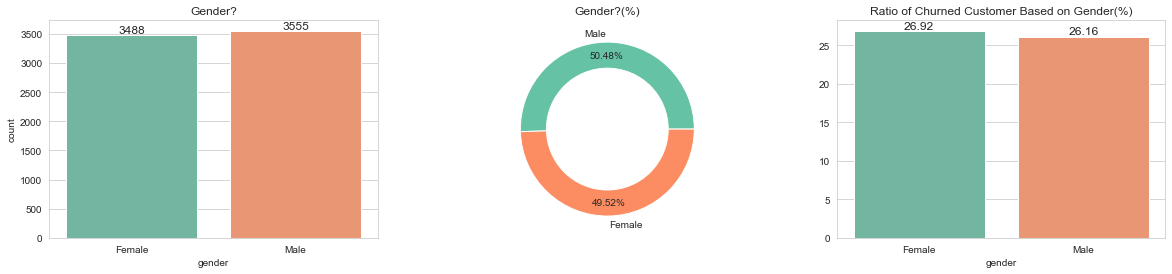

In [42]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
ax = sns.countplot(x='gender', data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Gender?')

plt.subplot(1,3,2)
plt.pie(df.value_counts('gender'), labels=df.value_counts('gender').index, autopct="%.2f%%", pctdistance=0.85, colors=colors)
plt.title("Gender?(%)")
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ratio_gender = df.query('churn=="Yes"').value_counts('gender').sort_index()
ratio_gender = ratio_gender.astype(np.float64)
for i,(k,v) in enumerate(ratio_gender.items()):
    ratio_gender[k] = (ratio_gender[k]/df[(df['gender']==k)].shape[0]*100).round(2)

plt.subplot(1, 3, 3)
ax = sns.barplot(y=ratio_gender.values, x=ratio_gender.index, order= df['gender'].value_counts().sort_index().index, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Ratio of Churned Customer Based on Gender(%)')
plt.show()

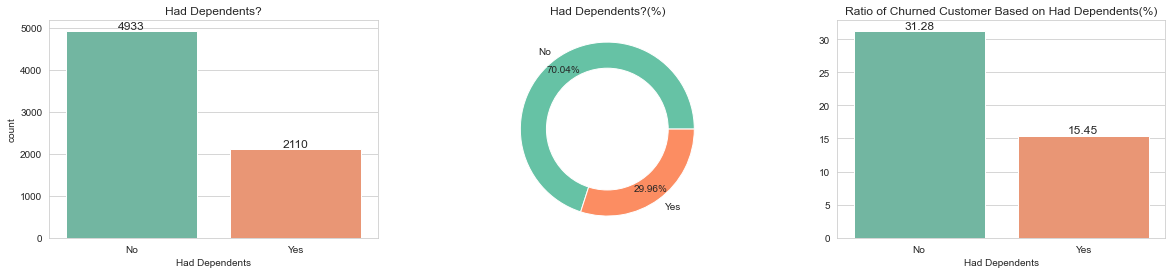

In [43]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
ax = sns.countplot(x='dependents', data=df, palette=colors)
ax.set_xlabel('Had Dependents')
ax.set_xticklabels(['No','Yes'])
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Had Dependents?')

plt.subplot(1,3,2)
plt.pie(df.value_counts('dependents'), labels=['No', 'Yes'], autopct="%.2f%%", pctdistance=0.85, colors=colors)
plt.title("Had Dependents?(%)")
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ratio_dependents = df.query('churn=="Yes"').value_counts('dependents').sort_index()
ratio_dependents = ratio_dependents.astype(np.float64)
for i,(k,v) in enumerate(ratio_dependents.items()):
    ratio_dependents[k] = (ratio_dependents[k]/df[(df['dependents']==k)].shape[0]*100).round(2)

plt.subplot(1, 3, 3)
ax = sns.barplot(y=ratio_dependents.values, x=ratio_dependents.index, order= df['dependents'].value_counts().sort_index().index, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
ax.set_xlabel('Had Dependents')
ax.set_xticklabels(['No','Yes'])
plt.title('Ratio of Churned Customer Based on Had Dependents(%)')
plt.show()

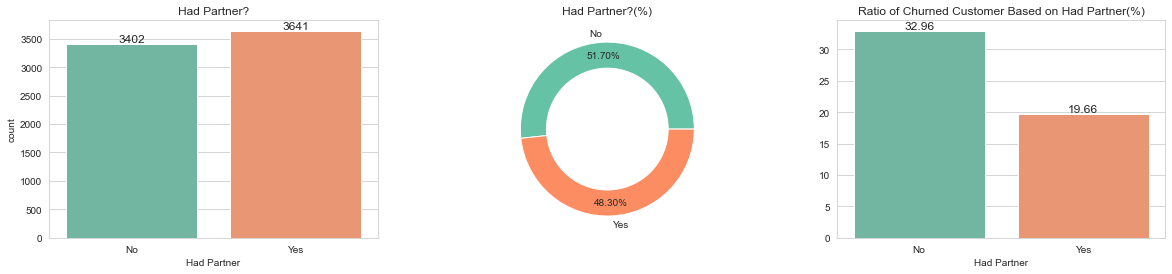

In [44]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
ax = sns.countplot(x='partner', data=df, palette=colors)
ax.set_xlabel('Had Partner')
ax.set_xticklabels(['No','Yes'])
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Had Partner?')

plt.subplot(1,3,2)
plt.pie(df.value_counts('partner'), labels=['No', 'Yes'], autopct="%.2f%%", pctdistance=0.85, colors=colors)
plt.title("Had Partner?(%)")
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

ratio_partner = df.query('churn=="Yes"').value_counts('partner').sort_index()
ratio_partner = ratio_partner.astype(np.float64)
for i,(k,v) in enumerate(ratio_partner.items()):
    ratio_partner[k] = (ratio_partner[k]/df[(df['partner']==k)].shape[0]*100).round(2)

plt.subplot(1, 3, 3)
ax = sns.barplot(y=ratio_partner.values, x=ratio_partner.index, order= df['partner'].value_counts().sort_index().index, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
ax.set_xlabel('Had Partner')
ax.set_xticklabels(['No','Yes'])
plt.title('Ratio of Churned Customer Based on Had Partner(%)')
plt.show()

## **5. Data Preprocessing**

### 5.1 Cleaning Dataset

In [45]:
missval_tables = pd.DataFrame(columns=["columns", "missval(count)", "missval(%)"])
for i, col in enumerate(df.columns):
    if df[col].isnull().sum()>0:
        missval_tables.loc[i]=[col, df[col].isnull().sum(), df[col].isnull().sum()/df.shape[0]]
        missval_tables.reset_index(drop=True, inplace=True)
        
missval_tables

,columns,missval(count),missval(%)
0,totalcharges,11,0.001562


- Setelah melewati proses pengubahan nilai pada kolom totalcharges didapatkan terdapat hingga 11 missing value dalam kolom ini

In [46]:
df.drop(['customerid'], axis=1, inplace=True)

- Kita akan drop kolom `customerid` karena hanya merupakan identifier untuk tiap-tiap baris. Tidak ada informasi yang bisa didapatkan jika mengolah kolom ini karena tiap-tiap baris bernilai unik.

In [47]:
df['churn'] = np.where(df['churn']=='Yes', 1, 0)

- Ubah kolom kategorik pada `churn` ubah nilai dengan label 0 dan 1 untuk memudahkan kita dalam proses evaluasi model ANN nantinya

### 5.2. Set Data Inference

- Kita akan mengambil sampel secara acak dari dataset utama, yang nantinya akan dijadikan sebagai dataset `inference` atau dataset asing.

In [48]:
df_inf = df.sample(10, random_state=40)

In [49]:
df = df.drop(df_inf.index)

In [50]:
# reset index

df.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

### 5.3 Split Dataset

In [51]:
X = df.drop('churn', axis=1)
y = df['churn']

#### 5.3.1 Split into Data Train and Dataset

In [52]:
# Splitting Train-Test
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [53]:
# Splitting Train-Val
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=40)

In [54]:
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

#### 5.3.2 Checking Data and Column Distributions

In [55]:
preprocess_handling = pd.DataFrame({'columns':X_train.describe().columns, 'skew' : X_train.skew(axis=0)})
preprocess_handling.reset_index(drop=True, inplace=True)

preprocess_handling['status'] = np.where(preprocess_handling['skew'].abs()>0.5, 'Skewed', 'Normal')

/var/folders/gt/ztn1_6ks3pzcv7b7gq4nrxjr0000gn/T/ipykernel_7854/1101815242.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  preprocess_handling = pd.DataFrame({'columns':X_train.describe().columns, 'skew' : X_train.skew(axis=0)})


In [56]:
preprocess_handling

,columns,skew,status
0,seniorcitizen,1.834125,Skewed
1,tenure,0.244462,Normal
2,monthlycharges,-0.238995,Normal
3,totalcharges,0.956122,Skewed


In [57]:
X_train.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,4219.000000,4219.000000,4219.000000,4210.000000
mean,0.162124,32.171605,65.090898,2285.491960
std,0.368608,24.506547,30.067472,2269.244826
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,8.000000,36.250000,390.512500
50%,0.000000,29.000000,70.600000,1408.450000
75%,0.000000,55.000000,89.925000,3778.175000
max,1.000000,72.000000,118.650000,8670.100000


In [58]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('='*50)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']
Categorical Columns:  ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


#### 5.4 Handling Outliers

- Fungsi untuk menangani baik kolom yang terdistribusi `normal` dan juga kolom yang terdistribusi `skewed`

In [59]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary
    
# Since it's skewed, we are using IQR to handle outliers

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower = df[variable].quantile(0.25) - distance * IQR
    upper = df[variable].quantile(0.75) + distance * IQR

    return upper, lower

- Fungsi untuk menampilkan visual pendistrbusian data tiap-tiap kolom fitur baik sebelum ditangani maupun setelah ditangani `outlier`-nya 

In [60]:

# Function to create histogram and boxplot for each features

def diagnostic_plots(df, df_trim, variable):
    #Define figure size
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_trim[variable], bins=30, kde=True, color='#006699')
    plt.title(f'Histogram of {variable}')

    #Boxplot Before
    plt.subplot(1,3, 2)
    sns.boxplot(y=df[variable])
    plt.title(f'Before Handling in {variable}')

    #Boxplot After
    plt.subplot(1,3, 3)
    sns.boxplot(y=df_trim[variable])
    plt.title(f'After Handling in {variable}')

    plt.show()

#### 5.4.1 Detect Outliers
- Sebelum melakukan penanganan pada `outliers`, alangkah baiknya kita check terlebih dahulu apakah kolom tersebut memiliki `outlier` dan seberapa banyak `outlier` tersebut dibandingkan dengan total keseluruhan data yang terdapat pada data `Training`.

In [61]:
j = 0
outliers={}
for i in X_train.describe().columns:
    if preprocess_handling['status'].loc[(preprocess_handling['columns']==i)].values[0]== 'Normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, i)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, i, 1.5)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    print("="*30)
    j+=1

Batas lower dan upper untuk seniorcitizen:(0.0, 0.0)
Batas lower dan upper untuk tenure:(-41.34803534416171, 105.69124463546297)
Batas lower dan upper untuk monthlycharges:(-25.111517853338185, 155.29331448761172)
Batas lower dan upper untuk totalcharges:(-4690.98125, 8859.668749999999)


- Pada proses handling outlier ini, saya menetapkan sikap bahwa:
    - `Trimming`: Jika outlier dibawah 5%
    - `Capping`: Jika outlier berada direntang 5-15%
    - `Keep`: Jika outlier berada di atas 15%

- Khusus pada kolom `seniorcitizen` terlepas sebanyak berapapun persentase outlier-nya, outlier terseput akan tetap dibiarkan karena pada dasarnya kolom ini hanyalah sebuah kolom kategorik yang telah dilabelkan, sehingga batas atas dan bawah justru berada pada label yang mayoritas

In [62]:
for i, (k, v) in enumerate(outliers.items()):
    X_train_trimmed_sim = X_train.loc[~outliers[k]]
    preprocess_handling.loc[i,'trimmed_row'] = X_train.shape[0] - X_train_trimmed_sim.shape[0]
    preprocess_handling.loc[i,'percentage'] = np.round(100-(X_train_trimmed_sim.shape[0]/X_train.shape[0]*100), 2)
    preprocess_handling.loc[i,'action'] = np.where(preprocess_handling.loc[i,'percentage']>15, 'Keep', 
                                        np.where(preprocess_handling.loc[i,'percentage']>5, 'Capping', np.where(preprocess_handling.loc[i,'percentage']>0, 'Trim', 'None')))


In [63]:
preprocess_handling

,columns,skew,status,trimmed_row,percentage,action
0,seniorcitizen,1.834125,Skewed,684.0,16.21,Keep
1,tenure,0.244462,Normal,0.0,0.00,None
2,monthlycharges,-0.238995,Normal,0.0,0.00,None
3,totalcharges,0.956122,Skewed,0.0,0.00,None


#### 5.4.2 Handling Outliers

- Karena tidak ditemukannya satupun outliers, maka kita akan melewati tahapan ini

### 5.5 Handling Missing Value

In [64]:
missval_tables

,columns,missval(count),missval(%)
0,totalcharges,11,0.001562


- Terdapat 11 kolom secara keseluruhan yang memiliki missing value.
- Kita akan melakukan deteksi ke semua dataset yang telah di split baik train, validation, maupun test set
- Isi pada kolom tersebut ialah hasil perkalian monthlycharges dengan tenure milik masing-masing pelanggan

In [65]:
X_train['totalcharges'] = X_train['totalcharges'].fillna(X_train['monthlycharges']*X_train['tenure'])
X_val['totalcharges'] = X_val['totalcharges'].fillna(X_val['monthlycharges']*X_val['tenure'])
X_test['totalcharges'] = X_test['totalcharges'].fillna(X_test['monthlycharges']*X_test['tenure'])

In [66]:
print("Jumlah Missing Value Setelah Di Handle Pada Train Set:", X_train.isnull().sum().sum())
print("Jumlah Missing Value Setelah Di Handle Pada Validation Set:", X_val.isnull().sum().sum())
print("Jumlah Missing Value Setelah Di Handle Pada Test Set:", X_test.isnull().sum().sum())

Jumlah Missing Value Setelah Di Handle Pada Train Set: 0
Jumlah Missing Value Setelah Di Handle Pada Validation Set: 0
Jumlah Missing Value Setelah Di Handle Pada Test Set: 0


- Sudah tidak ditemukannya missing value setelah melewati tahapan ini

### 5.6 Feature Selection

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
feature_names = [f"{X_train[num_columns].columns[i]}" for i in range(X_train[num_columns].shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train[num_columns], y_train)

RandomForestClassifier(random_state=0)

In [69]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)


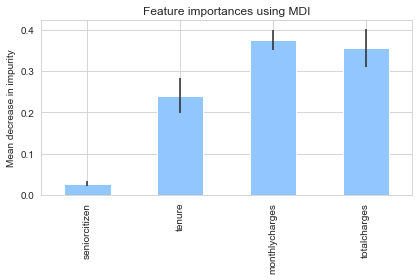

In [70]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

- Dari Kolom numerik, setelah melewati `randomforestclassifier` untuk menentukan fitur mana yang memiliki pengaruh terhadap label target yaitu churn, didapatkan bahwa tenure, monthlycharges, dan totalcharges memiliki tingkatan yang sama-sama tinggi
- Seniorcitizen memiliki pengaruh yang kecil namun bukan berarti kita akan membuang kolom ini
- Pada dasarnya kolom ini berisi pernyataan apakah pelanggan tersebut sudah tua ataupun belum, sehingga kita tetap akan mempertimbangkan kolom ini masuk pada kriteria saat pertimbangan model

- Bagaimana dengan kolom kategorik lainnya khususnya pada kolom layanan yang digunakan oleh tiap-tiap pelanggan?
- Karena didapatkan fakta bahwa ternyata semakin banyak harga yang harus dibayar cenderung membuat pelanggan juga mudah untuk berhenti dan semakin banyak harga yang harus dibayar cenderung pelayanan yang digunakan juga semakin banyak, maka informasi pada kolom-kolom ini tetap akan dibiarkan dan masuk dalam pertimbangan machine learning model

### 5.7 Feature Scaling & Encoding

#### 5.7.1 Splitting Columns (Numerical and Categorical)

In [71]:
num_columns.remove('seniorcitizen')
cat_columns.append('seniorcitizen')
# Split on X_train

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

# Split on X_train

X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]

# Split on X_test

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

#### 5.7.2 Feature Scaling

In [72]:
# Feature Scaling Using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_val_num_scaled = scaler.transform(X_val_num)
X_test_num_scaled = scaler.transform(X_test_num)

#### 5.7.3 Feature Encoding

- Karena terdapat banyak pengaruh kolom kategorik dengan kolom target, maka kita akan menggunakan ordinal encoding meskipun sebagian tampaknya tidak memiliki pengaruh namun belum kita ketahui karena eksplorasi yang belum sempat dilakukan pada kolom lainnya

In [73]:
# Feature Encoding

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


encoder = OrdinalEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_val_cat_encoded = encoder.transform(X_val_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

# encoder = OneHotEncoder()
# encoder.fit(X_train_cat)

# X_train_cat_encoded = encoder.transform(X_train_cat)
# X_val_cat_encoded = encoder.transform(X_val_cat)
# X_test_cat_encoded = encoder.transform(X_test_cat)


In [74]:
X_train_num_scaled

array([[ 1.62540716,  1.65511087,  2.66078406],
       [ 0.52353015,  1.56696531,  1.21252838],
       [-0.33348531,  1.04640758, -0.00756566],
       ...,
       [ 1.5845969 ,  0.83186462,  1.77623351],
       [-0.61915712,  1.30086551, -0.23671893],
       [ 1.09487378,  1.04973383,  1.45446257]])

In [75]:
X_train_num_scaled.shape

(4219, 3)

#### 5.7.4 Concatenate Numerical & Categorical

In [76]:
# Concate Data

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_val_final = np.concatenate([X_val_num_scaled, X_val_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

### 5.8 Preprocessing Input Layer

- Untuk mempercepat proses training, maka kita menggunakan preprocessing input layer pada tensorflow, dimana data-data kita akan dipecah dan dikelompokkan satu sama lain sebelum masuk tahap training model ANN

In [77]:
import tensorflow as tf

#Train Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_final, y_train)).shuffle(1000).batch(20)

#Validation Dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).shuffle(1000).batch(20)

#Test Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).shuffle(1000).batch(20)

## **6. Model Definition**

### 6.1. Sequential API

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential API
seq_mod = Sequential()
seq_mod.add(Dense(10, input_shape=(19,), activation="relu"))
seq_mod.add(Dense(5, activation="relu"))
seq_mod.add(Dense(1, activation="sigmoid"))
seq_mod.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


### 6.2. Functional API

In [79]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Functional API
data_in = Input(shape=(19,))
hidden_1= Dense(10, activation="relu")(data_in)
output_layer = Dense(1, activation="sigmoid")(hidden_1)

func_mod = Model(inputs=data_in, outputs=output_layer)



In [80]:
func_mod.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_3 (Dense)             (None, 10)                200       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [81]:
func_mod.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## **7. Model Training**

In [82]:
seq_hist = seq_mod.fit(train_dataset, epochs=150, validation_data=val_dataset)

Epoch 1/150
  1/211 [..............................] - ETA: 1:20 - loss: 0.6998 - accuracy: 0.4000

2022-03-24 15:38:40.124002: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


211/211 [==============================] - 1s 948us/step - loss: 0.5395 - accuracy: 0.7243 - val_loss: 0.4503 - val_accuracy: 0.7626
Epoch 2/150
211/211 [==============================] - 0s 470us/step - loss: 0.4550 - accuracy: 0.7748 - val_loss: 0.4323 - val_accuracy: 0.7903
Epoch 3/150
211/211 [==============================] - 0s 465us/step - loss: 0.4423 - accuracy: 0.7867 - val_loss: 0.4272 - val_accuracy: 0.7925
Epoch 4/150
211/211 [==============================] - 0s 440us/step - loss: 0.4367 - accuracy: 0.7888 - val_loss: 0.4207 - val_accuracy: 0.7989
Epoch 5/150
211/211 [==============================] - 0s 440us/step - loss: 0.4333 - accuracy: 0.7907 - val_loss: 0.4181 - val_accuracy: 0.8031
Epoch 6/150
211/211 [==============================] - 0s 459us/step - loss: 0.4304 - accuracy: 0.7940 - val_loss: 0.4217 - val_accuracy: 0.8031
Epoch 7/150
211/211 [==============================] - 0s 561us/step - loss: 0.4279 - accuracy: 0.7973 - val_loss: 0.4152 - val_accuracy: 0.80

In [83]:
func_hist = func_mod.fit(train_dataset, epochs=150, validation_data=val_dataset)

Epoch 1/150
211/211 [==============================] - 1s 697us/step - loss: 0.5308 - accuracy: 0.7094 - val_loss: 0.4404 - val_accuracy: 0.7875
Epoch 2/150
211/211 [==============================] - 0s 524us/step - loss: 0.4485 - accuracy: 0.7765 - val_loss: 0.4231 - val_accuracy: 0.7996
Epoch 3/150
211/211 [==============================] - 0s 454us/step - loss: 0.4378 - accuracy: 0.7838 - val_loss: 0.4194 - val_accuracy: 0.8024
Epoch 4/150
211/211 [==============================] - 0s 461us/step - loss: 0.4333 - accuracy: 0.7869 - val_loss: 0.4176 - val_accuracy: 0.7982
Epoch 5/150
211/211 [==============================] - 0s 933us/step - loss: 0.4307 - accuracy: 0.7886 - val_loss: 0.4168 - val_accuracy: 0.7996
Epoch 6/150
211/211 [==============================] - 0s 489us/step - loss: 0.4288 - accuracy: 0.7893 - val_loss: 0.4164 - val_accuracy: 0.8045
Epoch 7/150
211/211 [==============================] - 0s 431us/step - loss: 0.4272 - accuracy: 0.7905 - val_loss: 0.4161 - val_ac

## **8. Model Evaluation**

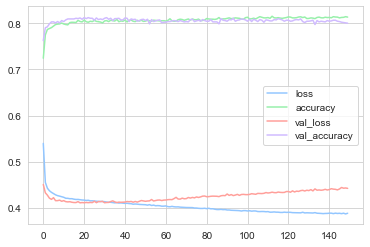

In [84]:
seq_metrics = pd.DataFrame(seq_hist.history)
seq_metrics.plot();

- Model terlihat overfit dengan semakin bertambahnya perulangan/epoch yang dilakukan

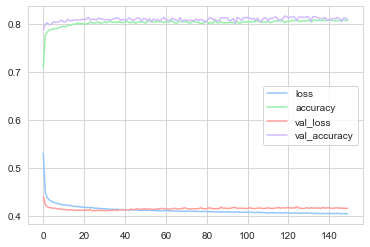

In [85]:
func_metrics = pd.DataFrame(func_hist.history)
func_metrics.plot();

- Jika kita memperhatikan evaluasi pada metriks `loss`, Model terlihat overfit dengan semakin bertambahnya perulangan/epoch yang dilakukan

In [86]:
from sklearn.metrics import classification_report

y_pred_seq = seq_mod.predict(test_dataset)
y_pred_seq[y_pred_seq <= 0.5] = 0
y_pred_seq[y_pred_seq > 0.5] = 1
y_pred_seq = y_pred_seq.squeeze()

In [87]:
print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1054
           1       0.26      0.21      0.23       353

    accuracy                           0.65      1407
   macro avg       0.50      0.50      0.50      1407
weighted avg       0.63      0.65      0.64      1407



- Hasil evaluasi tampak terlihat masih belum goodfit, dan terdapat kesenjangan evaluasi pada prediksi label 0 yang berarti tidak berhenti menggunakan layanan dan label 1 yang berarti berhenti menggunakan layanan

In [88]:
y_pred_func = func_mod.predict(test_dataset)
y_pred_func[y_pred_func <= 0.5] = 0
y_pred_func[y_pred_func > 0.5] = 1
y_pred_func = y_pred_func.squeeze()

In [89]:
print(classification_report(y_test, y_pred_func))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1054
           1       0.27      0.23      0.25       353

    accuracy                           0.65      1407
   macro avg       0.51      0.51      0.51      1407
weighted avg       0.63      0.65      0.64      1407



- Hal yang sama juga terjadi pada model yang menggunakan `Functional API`

## **9. Model Improvement**

- Setelah mengetahui bahwa jumlah epoch yang terlalu banyak semakin mempengaruhi tingkat overfit pada model yang dibuat, maka kita akan melimitasi jumlah epoch sebanyak 100
- Kemudian kita juga akan mencoba menggunakan fungsi Batch Normalization maupun Dropout untuk mencegah terjadinya overfit ini
- Diketahui juga ternyata semakin bertambahnya hidden layer justru mengakibatkan model juga semakin buruk dalam mengevaluasi validation set, maka hidden layer yang digunakan cukup hanya 1 saja

### 9.1. Sequential API

In [90]:
from tensorflow.keras import initializers
from tensorflow.keras import layers

# Sequential API
seq_mod_imp = Sequential()
seq_mod_imp.add(Dense(10, input_shape=(19,), activation="elu"))
seq_mod_imp.add(layers.BatchNormalization())
seq_mod_imp.add(layers.Activation('elu'))
seq_mod_imp.add(layers.Dropout(0.3))
seq_mod_imp.add(Dense(1, activation="sigmoid"))

seq_mod_imp.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [91]:
seq_mod_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                200       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 231
Non-trainable params: 20
_______________________________________________________

In [92]:
seq_hist_imp = seq_mod_imp.fit(X_train_final, y_train , epochs=100, validation_data=(X_val_final, y_val))

Epoch 1/100
132/132 [==============================] - 1s 6ms/step - loss: 0.7983 - accuracy: 0.5241 - val_loss: 0.5379 - val_accuracy: 0.7520
Epoch 2/100
132/132 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.7025 - val_loss: 0.4656 - val_accuracy: 0.7882
Epoch 3/100
132/132 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.7322 - val_loss: 0.4462 - val_accuracy: 0.8031
Epoch 4/100
132/132 [==============================] - 0s 816us/step - loss: 0.4926 - accuracy: 0.7592 - val_loss: 0.4329 - val_accuracy: 0.7910
Epoch 5/100
132/132 [==============================] - 0s 3ms/step - loss: 0.4800 - accuracy: 0.7642 - val_loss: 0.4267 - val_accuracy: 0.7953
Epoch 6/100
132/132 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7751 - val_loss: 0.4227 - val_accuracy: 0.8003
Epoch 7/100
132/132 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.7741 - val_loss: 0.4209 - val_accuracy: 0.80

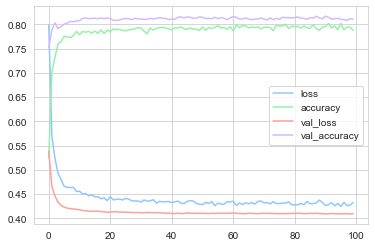

In [93]:
seq_metrics_imp = pd.DataFrame(seq_hist_imp.history)
seq_metrics_imp.plot();

In [94]:
y_pred_seq_imp = seq_mod_imp.predict(X_test_final)
y_pred_seq_imp[y_pred_seq_imp <= 0.5] = 0
y_pred_seq_imp[y_pred_seq_imp > 0.5] = 1
y_pred_seq_imp = y_pred_seq_imp.squeeze()

print(classification_report(y_test, y_pred_seq_imp))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1054
           1       0.64      0.53      0.58       353

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



### 9.2. Functional API

In [95]:
# Functional API
data_in = Input(shape=(19,))
hidden_1= Dense(10, activation="elu")(data_in)
hidden_2= layers.BatchNormalization()(hidden_1)
hidden_3= layers.Dropout(0.3)(hidden_2)
output_layer = Dense(1, activation="sigmoid")(hidden_3)

func_mod_imp = Model(inputs=data_in, outputs=output_layer)



In [96]:
func_mod_imp.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_7 (Dense)             (None, 10)                200       
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 231
Non-trainable params: 20
____________________________________________________________

In [97]:
func_mod_imp.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['Accuracy'])

In [98]:
func_hist_imp = func_mod_imp.fit(X_train_final, y_train, epochs=100, validation_data=(X_val_final, y_val))

Epoch 1/100
132/132 [==============================] - 0s 1ms/step - loss: 0.6800 - Accuracy: 0.6682 - val_loss: 0.5135 - val_Accuracy: 0.7584
Epoch 2/100
132/132 [==============================] - 0s 592us/step - loss: 0.5568 - Accuracy: 0.7279 - val_loss: 0.4549 - val_Accuracy: 0.7761
Epoch 3/100
132/132 [==============================] - 0s 562us/step - loss: 0.5072 - Accuracy: 0.7575 - val_loss: 0.4293 - val_Accuracy: 0.7989
Epoch 4/100
132/132 [==============================] - 0s 725us/step - loss: 0.4771 - Accuracy: 0.7684 - val_loss: 0.4242 - val_Accuracy: 0.8003
Epoch 5/100
132/132 [==============================] - 0s 1ms/step - loss: 0.4785 - Accuracy: 0.7708 - val_loss: 0.4179 - val_Accuracy: 0.8003
Epoch 6/100
132/132 [==============================] - 0s 1ms/step - loss: 0.4677 - Accuracy: 0.7739 - val_loss: 0.4141 - val_Accuracy: 0.8067
Epoch 7/100
132/132 [==============================] - 0s 721us/step - loss: 0.4635 - Accuracy: 0.7748 - val_loss: 0.4135 - val_Accuracy

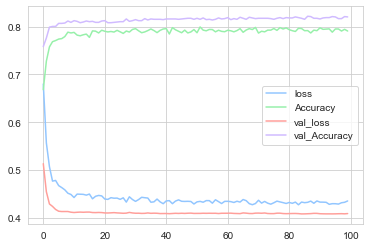

In [99]:
func_metrics_imp = pd.DataFrame(func_hist_imp.history)
func_metrics_imp.plot();

- Hasil evaluasi pada improved functional API, model tampak sudah tidak terlihat overfit, dan nilai evaluasi cenderung stabil

In [100]:
y_pred_func_imp = func_mod_imp.predict(X_test_final)
y_pred_func_imp[y_pred_func_imp <= 0.5] = 0
y_pred_func_imp[y_pred_func_imp > 0.5] = 1
y_pred_func_imp = y_pred_func_imp.squeeze()

print(classification_report(y_test, y_pred_func_imp))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1054
           1       0.64      0.54      0.59       353

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



- Namun untuk hasil evaluasi untuk prediksi pada test set, tidak terlalu berbeda jauh dengan model yang belum di-improved

### 9.3.  Using SMOTE In Functional API

In [101]:
from imblearn.over_sampling import SMOTENC

In [102]:
X_resampled, y_resampled = SMOTENC(categorical_features=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], sampling_strategy={1:2400}).fit_resample(X_train_final, y_train) # Minority Class will have same the same number as the majority class
# X_resampled, y_resampled = SMOTE(sampling_strategy={"Fraud":1000}).fit_resample(X, y) # Minority Class will have 1000 data
y_resampled.value_counts()

0    3078
1    2400
Name: churn, dtype: int64

In [103]:
# Functional API
data_in = Input(shape=(19,))
hidden_1= Dense(18, activation="elu")(data_in)
hidden_2= layers.BatchNormalization()(hidden_1)
hidden_3= layers.Dropout(0.3)(hidden_2)
output_layer = Dense(1, activation="sigmoid")(hidden_3)

func_mod_imp_smote = Model(inputs=data_in, outputs=output_layer)

# Compile Model
func_mod_imp_smote.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['Accuracy'])


In [104]:
func_hist_imp_smote = func_mod_imp_smote.fit(X_resampled, y_resampled, epochs=100, validation_data=(X_val_final, y_val))

Epoch 1/100
172/172 [==============================] - 1s 2ms/step - loss: 0.6135 - Accuracy: 0.6829 - val_loss: 0.4754 - val_Accuracy: 0.7690
Epoch 2/100
172/172 [==============================] - 0s 1ms/step - loss: 0.5263 - Accuracy: 0.7391 - val_loss: 0.4692 - val_Accuracy: 0.7719
Epoch 3/100
172/172 [==============================] - 0s 1ms/step - loss: 0.5159 - Accuracy: 0.7452 - val_loss: 0.4626 - val_Accuracy: 0.7854
Epoch 4/100
172/172 [==============================] - 0s 788us/step - loss: 0.5066 - Accuracy: 0.7483 - val_loss: 0.4522 - val_Accuracy: 0.7868
Epoch 5/100
172/172 [==============================] - 0s 1ms/step - loss: 0.4961 - Accuracy: 0.7563 - val_loss: 0.4488 - val_Accuracy: 0.7910
Epoch 6/100
172/172 [==============================] - 0s 595us/step - loss: 0.4931 - Accuracy: 0.7552 - val_loss: 0.4577 - val_Accuracy: 0.7811
Epoch 7/100
172/172 [==============================] - 0s 518us/step - loss: 0.4920 - Accuracy: 0.7585 - val_loss: 0.4568 - val_Accuracy: 

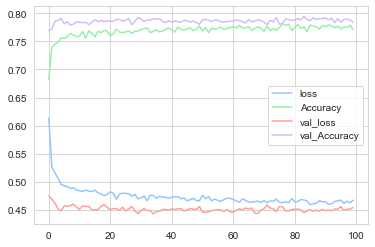

In [105]:
func_metrics_imp_smote = pd.DataFrame(func_hist_imp_smote.history)
func_metrics_imp_smote.plot();

In [106]:
y_pred_func_imp_smote = func_mod_imp_smote.predict(X_test_final)
y_pred_func_imp_smote[y_pred_func_imp_smote <= 0.5] = 0
y_pred_func_imp_smote[y_pred_func_imp_smote > 0.5] = 1
y_pred_func_imp_smote = y_pred_func_imp_smote.squeeze()

print(classification_report(y_test, y_pred_func_imp_smote))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1054
           1       0.54      0.74      0.62       353

    accuracy                           0.78      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.81      0.78      0.79      1407



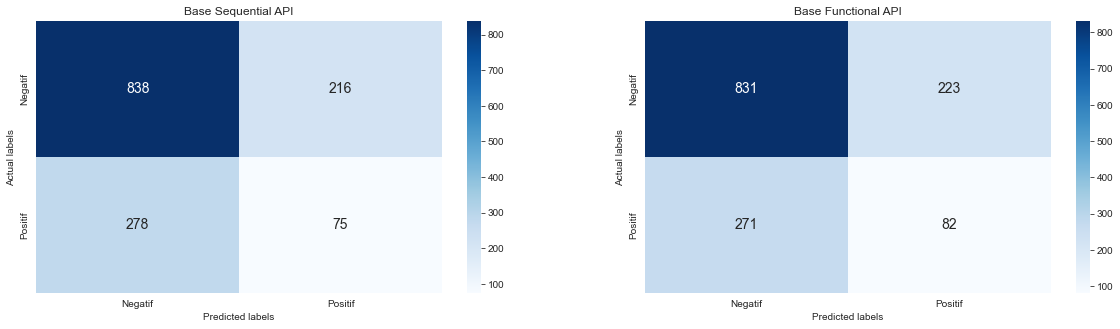

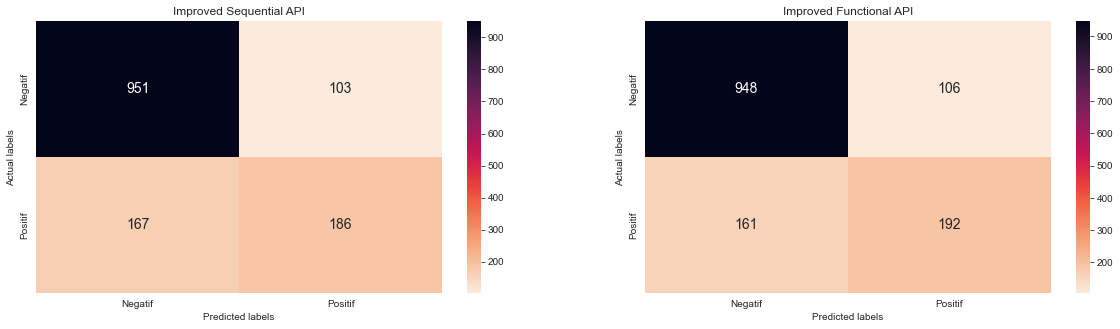

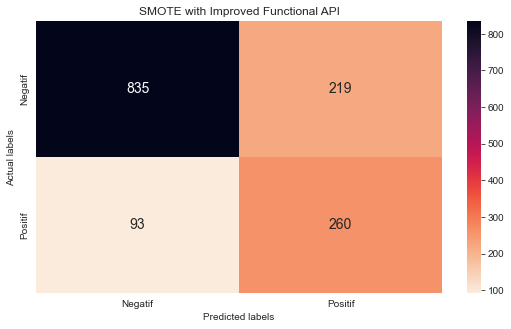

In [107]:
from sklearn.metrics import confusion_matrix

#plotting confusion matrix
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
seq_matrix1= confusion_matrix(y_test, y_pred_seq)
ax = sns.heatmap(seq_matrix1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Base Sequential API")

plt.subplot(1,2,2)
func_matrix1= confusion_matrix(y_test, y_pred_func)
ax = sns.heatmap(func_matrix1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Base Functional API")
#plotting confusion matrix
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
seq_matrix2= confusion_matrix(y_test, y_pred_seq_imp)
ax = sns.heatmap(seq_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Improved Sequential API")



plt.subplot(1,2,2)
func_matrix2= confusion_matrix(y_test, y_pred_func_imp)
ax = sns.heatmap(func_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Improved Functional API")

#plotting confusion matrix
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
smote_matrix2= confusion_matrix(y_test, y_pred_func_imp_smote)
ax = sns.heatmap(smote_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("SMOTE with Improved Functional API")

plt.show()

- Dari hasil Confussion Matrix kita akan mempertimbangkan model yang memiliki False Negative yang paling sedikit atau dalam arti lain memiliki nilai recall yang paling tinggi pada label 1
- Ini dikarenakan kita tidak ingin pelanggan yang diprediksi tidak berhenti atau tetap menggunakan layanan, ternyata berhenti menggunakan layanan
- Terlihat Functional API yang telah di-improve memiliki jumalh false negatif paling sedikit dibandingkan model lainnya, oleh karena itu model ini akan digunakan pada tahap pengujian dengan menggunakan data inference

## **10. Build Pipeline And Model For Inference**

In [108]:
# build preprocesing pipeline

from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

# Final pipeline
final_pipe = make_pipeline(data_pipeline)
final_pipe.fit(X_train)

with open("preprocess_pipe.pkl", "wb") as f:
    pickle.dump(final_pipe, f)

In [109]:
# save model
func_mod_imp_smote.save('seq_mod_imp.h5')
print('Model Saved!')

Model Saved!


- Agar model dapat digunakan secara eksternal atau diluar dari notebook, maka kita akan menyimpan pipeline preprocessing dan model training dengan menggunakan ekstensi masing-masing file

## **11. Model Inference**

In [110]:
df_inf.isnull().sum().sum()

0

In [111]:
with open("preprocess_pipe.pkl", "rb") as f:
    pipeline = pickle.load(f)

In [112]:
df_final = pipeline.transform(df_inf)

In [113]:
from tensorflow.keras.models import load_model

savedModel=load_model('seq_mod_imp.h5')
savedModel.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense_9 (Dense)             (None, 18)                360       
                                                                 
 batch_normalization_2 (Batc  (None, 18)               72        
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 18)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 19        
                                                                 
Total params: 451
Trainable params: 415
Non-trainable params: 36
____________________________________________________________

In [114]:
y_pred_inf = savedModel.predict(df_final)
y_pred_inf = np.where(y_pred_inf>0.5, 1, 0)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['predicted_churn'])

In [115]:
df_inf_result = pd.concat([df_inf, y_pred_inf], axis=1)

In [116]:
df_inf_result.loc[:, ['gender', 'seniorcitizen', 'internetservice', 'tenure', 'monthlycharges', 'churn', 'predicted_churn']]

,gender,seniorcitizen,internetservice,tenure,monthlycharges,churn,predicted_churn
0,Male,1,Fiber optic,71,95.50,0,0
1,Male,0,Fiber optic,5,96.50,1,1
2,Female,0,Fiber optic,49,84.50,0,1
3,Female,0,DSL,1,25.85,0,0
4,Male,0,Fiber optic,9,75.85,0,1
5,Male,1,Fiber optic,38,80.45,0,0
6,Male,0,DSL,19,25.35,0,0
7,Male,0,No,25,19.15,0,0
8,Male,0,No,13,20.00,0,0
9,Female,0,DSL,48,60.35,1,0


<hr>

## **12. Conclusions**

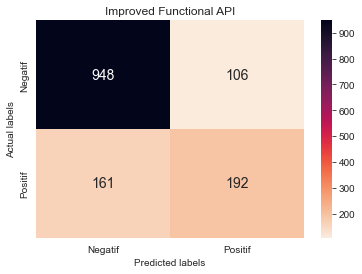

In [117]:
ax = sns.heatmap(func_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Improved Functional API")
plt.show()

- Kita telah berhasil membuat berbagai macam model dimana kita memilih Functional API Improved sebagai model terbaik
- Meskipun tidak overfit, Namun hasil evaluasi metriks yang didapatkan masih sangatlah jauh dibawah kata layak untuk diterima
- Ini dikarenakan meskipun false negatifnya lebih baik dari model yang lain, namun angkanya masih sangatlah rendah yaitu sebesar 0.24 
- Model pun juga tidak konsisten dalam memprediksi, dimana setiap kali perulangan akan menghasilkan angka yang berbeda
- Ini sangatlah wajar karena ANN terlalu powerfull untuk dataset yang berjumlah sedikit, sehingga menghasilkan hasil yang tidak konsisten

- Dari sisi Dataset:
    - Faktor-faktor yang menyebabkan seseorang memutuskan untuk berhenti ataupun tidak berhenti dalam menggunakan layanan telekomunikasi masih sangatlah kurang dalam dataset ini
    - Faktor tersebut seperti berapa banyak pelanggan melakukan komplain(frekuensi), tingkat resiko kendala yang dialami, dan keluhan apa yang dialami oleh mereka
